In [1]:
pip install lark-parser

Note: you may need to restart the kernel to use updated packages.


In [3]:

# with out probability computing impact of the region

# pip install lark-parser
# pip install pydot
# pip install pillow

from lark import Lark, Tree, Token
import pydot
from PIL import Image

process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor
    | xor "^" "[" NAME "]" parallel -> xor_probability

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

def get_tasks(t):
    return {subtree.children[0].value for subtree in t.iter_subtrees() if subtree.data == 'task'}

def dot_tree(t, id=0, imp={}):
    if isinstance(t, Token):
        label = t.value
        impact = f", {imp[label]}" if label in imp else ""
        return f'node_{id}[label="{label}{impact}"];', id
    
    if isinstance(t, Tree):
        label = t.data
        code = ""
        last_id = id
        child_ids = []
        for i, c in enumerate(t.children):
            dot_code, last_id = dot_tree(c, last_id, imp)
            code += f'\n{dot_code}'
            child_ids.append(last_id)
            last_id += 1
        code += f'\nnode_{last_id}[label="{label}"];'
        
        for i in child_ids:
            code += f'\nnode_{last_id} -> node_{i};'
        
        return code, last_id

def print_tree(dot_code, outfile="out.png"):
    dot_string = f"digraph my_graph {{{dot_code}}}"
    print(dot_string)  # Debugging: Print the DOT string
    graphs = pydot.graph_from_dot_data(dot_string)
    graph = graphs[0]
    graph.write_png(outfile)
    return Image.open(outfile)

# Example input
b1r2 = "( parcel || wait_24 ) , ( ( user_cancel, refund_user_fault ) ^[P_user_cancel] ( car ^[P_car] drone) )"
b1r1 = f'check_availability, (( {b1r2} ^[P_5_hours] ({b1r2} ^[P_10_hours] {b1r2}) ) ^[P_12_hours] (wait12, refund_company_fault))'
b1  = f'payment_validation, ( validation_cancel ^[P_init_cancel] {b1r1} )'
b1t = parser.parse(b1)
b1i = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "validation_cancel": [0, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_company_fault": [1, 105, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1]
}

# Generate and print the tree
dot_code, _ = dot_tree(b1t, 0, b1i)
img = print_tree(dot_code)
img.show()


digraph my_graph {

node_0[label="payment_validation, [0, 0, 0, 1]"];
node_1[label="task"];
node_1 -> node_0;


node_2[label="validation_cancel, [0, 0, 0, 1]"];
node_3[label="task"];
node_3 -> node_2;
node_4[label="P_init_cancel"];


node_5[label="check_availability, [1, 0, 0, 1]"];
node_6[label="task"];
node_6 -> node_5;





node_7[label="parcel, [1, 0, 0, 2]"];
node_8[label="task"];
node_8 -> node_7;

node_9[label="wait_24"];
node_10[label="task"];
node_10 -> node_9;
node_11[label="parallel"];
node_11 -> node_8;
node_11 -> node_10;



node_12[label="user_cancel, [0, 0, 0, 1]"];
node_13[label="task"];
node_13 -> node_12;

node_14[label="refund_user_fault, [1, 85, 0, 1]"];
node_15[label="task"];
node_15 -> node_14;
node_16[label="sequential"];
node_16 -> node_13;
node_16 -> node_15;
node_17[label="P_user_cancel"];


node_18[label="car, [5, 0, 10, 10]"];
node_19[label="task"];
node_19 -> node_18;
node_20[label="P_car"];

node_21[label="drone, [3, 0, 7, 0]"];
node_22[label="task"];
node

In [4]:
# formation of different sequences 

# pip install lark-parser
# pip install pydot
# pip install pillow

from lark import Lark, Tree, Token
import pydot
from PIL import Image
import random

process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor
    | xor "^" "[" NAME "]" parallel -> xor_probability

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

def get_tasks(t):
    return {subtree.children[0].value for subtree in t.iter_subtrees() if subtree.data == 'task'}

def dot_tree(t, id=0, imp={}):
    if isinstance(t, Token):
        label = t.value
        impact = f", {imp[label]}" if label in imp else ""
        return f'node_{id}[label="{label}{impact}"];', id
    
    if isinstance(t, Tree):
        label = t.data
        code = ""
        last_id = id
        child_ids = []
        for i, c in enumerate(t.children):
            dot_code, last_id = dot_tree(c, last_id, imp)
            code += f'\n{dot_code}'
            child_ids.append(last_id)
            last_id += 1
        code += f'\nnode_{last_id}[label="{label}"];'
        
        for i in child_ids:
            code += f'\nnode_{last_id} -> node_{i};'
        
        return code, last_id

def print_tree(dot_code, outfile="out.png"):
    dot_string = f"digraph my_graph {{{dot_code}}}"
    print(dot_string)  # Debugging: Print the DOT string
    graphs = pydot.graph_from_dot_data(dot_string)
    graph = graphs[0]
    graph.write_png(outfile)
    return Image.open(outfile)

def generate_random_sequence():
    parts = [
        "parcel", "wait_24", "user_cancel", "refund_user_fault",
        "car", "drone", "check_availability", "wait12",
        "refund_company_fault", "payment_validation", "validation_cancel"
    ]
    random.shuffle(parts)
    b1r2 = f"( {parts[0]} || {parts[1]} ) , ( ( {parts[2]}, {parts[3]} ) ^[P_user_cancel] ( {parts[4]} ^[P_car] {parts[5]} ) )"
    b1r1 = f'check_availability, (( {b1r2} ^[P_5_hours] ({b1r2} ^[P_10_hours] {b1r2}) ) ^[P_12_hours] (wait12, refund_company_fault))'
    b1 = f'payment_validation, ( validation_cancel ^[P_init_cancel] {b1r1} )'
    return b1

# Impact dictionary
b1i = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "validation_cancel": [0, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_company_fault": [1, 105, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1]
}

# Generate and visualize 5 different sequences
for i in range(5):
    sequence = generate_random_sequence()
    print(f"Sequence {i+1}: {sequence}")
    parsed_tree = parser.parse(sequence)
    dot_code, _ = dot_tree(parsed_tree, 0, b1i)
    img = print_tree(dot_code, f"out_{i+1}.png")
    img.show()


Sequence 1: payment_validation, ( validation_cancel ^[P_init_cancel] check_availability, (( ( payment_validation || check_availability ) , ( ( parcel, user_cancel ) ^[P_user_cancel] ( validation_cancel ^[P_car] drone ) ) ^[P_5_hours] (( payment_validation || check_availability ) , ( ( parcel, user_cancel ) ^[P_user_cancel] ( validation_cancel ^[P_car] drone ) ) ^[P_10_hours] ( payment_validation || check_availability ) , ( ( parcel, user_cancel ) ^[P_user_cancel] ( validation_cancel ^[P_car] drone ) )) ) ^[P_12_hours] (wait12, refund_company_fault)) )
digraph my_graph {

node_0[label="payment_validation, [0, 0, 0, 1]"];
node_1[label="task"];
node_1 -> node_0;


node_2[label="validation_cancel, [0, 0, 0, 1]"];
node_3[label="task"];
node_3 -> node_2;
node_4[label="P_init_cancel"];


node_5[label="check_availability, [1, 0, 0, 1]"];
node_6[label="task"];
node_6 -> node_5;





node_7[label="payment_validation, [0, 0, 0, 1]"];
node_8[label="task"];
node_8 -> node_7;

node_9[label="check_av

In [4]:
# pip install lark-parser
# pip install pydot
# pip install pillow

from lark import Lark, Tree, Token
import pydot
from PIL import Image
import random
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        r = (num_traces_1 * num_traces_2, 
             sum_lists(sum_impacts_1, sum_impacts_2),
             sum_lists(min_impact_1, min_impact_2), 
             sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        r = (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        r = (num_traces_1 + num_traces_2,
             sum_lists(impacts_1, impacts_2),
             pairwise_min_lists(min_impact_1, min_impact_2),
             pairwise_max_lists(max_impacts_1, max_impacts_2))

    return r

# Generate random sequences
def generate_random_sequence():
    parts = [
        "parcel", "wait_24", "user_cancel", "refund_user_fault",
        "car", "drone", "check_availability", "wait12",
        "refund_company_fault", "payment_validation", "validation_cancel"
    ]
    random.shuffle(parts)
    b1r2 = f"( {parts[0]} || {parts[1]} ) , ( ( {parts[2]}, {parts[3]} ) ^ ( {parts[4]} ^ {parts[5]} ) )"
    b1r1 = f'check_availability, (( {b1r2} ^ ({b1r2} ^ {b1r2}) ) ^ (wait12, refund_company_fault))'
    b1 = f'payment_validation, ( validation_cancel ^ {b1r1} )'
    return b1

# Impact dictionary
task_impacts = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "validation_cancel": [0, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_company_fault": [1, 105, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1],
    "wait_24": [0, 0, 0, 0],  # Added missing key
    "wait12": [0, 0, 0, 0]   # Added missing key
}

# Compute and print impacts for multiple sequences
num_sequences = 5
results = []

for i in range(num_sequences):
    sequence = generate_random_sequence()
    print(f"Sequence {i+1}: {sequence}")
    parsed_tree = parser.parse(sequence)
    result = compute_impact_vector(parsed_tree, task_impacts)
    results.append(result)

# Print results for each sequence
for i, result in enumerate(results):
    num_traces, sum_impacts, min_impacts, max_impacts = result
    print(f"Results for sequence {i+1}:")
    print(f"Number of traces: {num_traces}")
    print(f"Sum of impacts: {sum_impacts}")
    print(f"Min impacts: {min_impacts}")
    print(f"Max impacts: {max_impacts}")
    print()


Sequence 1: payment_validation, ( validation_cancel ^ check_availability, (( ( wait_24 || car ) , ( ( parcel, payment_validation ) ^ ( wait12 ^ drone ) ) ^ (( wait_24 || car ) , ( ( parcel, payment_validation ) ^ ( wait12 ^ drone ) ) ^ ( wait_24 || car ) , ( ( parcel, payment_validation ) ^ ( wait12 ^ drone ) )) ) ^ (wait12, refund_company_fault)) )
Sequence 2: payment_validation, ( validation_cancel ^ check_availability, (( ( validation_cancel || payment_validation ) , ( ( wait_24, check_availability ) ^ ( refund_user_fault ^ parcel ) ) ^ (( validation_cancel || payment_validation ) , ( ( wait_24, check_availability ) ^ ( refund_user_fault ^ parcel ) ) ^ ( validation_cancel || payment_validation ) , ( ( wait_24, check_availability ) ^ ( refund_user_fault ^ parcel ) )) ) ^ (wait12, refund_company_fault)) )
Sequence 3: payment_validation, ( validation_cancel ^ check_availability, (( ( wait_24 || refund_company_fault ) , ( ( payment_validation, car ) ^ ( parcel ^ wait12 ) ) ^ (( wait_24 

In [5]:

# all infomation about the sequence , like number of task in the sequence etc 
# pip install lark-parser
# pip install pydot
# pip install pillow

from lark import Lark, Tree, Token
import pydot
from PIL import Image
import random
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        r = (num_traces_1 * num_traces_2, 
             sum_lists(sum_impacts_1, sum_impacts_2),
             sum_lists(min_impact_1, min_impact_2), 
             sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        r = (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        r = (num_traces_1 + num_traces_2,
             sum_lists(impacts_1, impacts_2),
             pairwise_min_lists(min_impact_1, min_impact_2),
             pairwise_max_lists(max_impacts_1, max_impacts_2))

    return r

# Generate random sequence
def generate_random_sequence():
    parts = [
        "parcel", "wait_24", "user_cancel", "refund_user_fault",
        "car", "drone", "check_availability", "wait12",
        "refund_company_fault", "payment_validation", "validation_cancel"
    ]
    random.shuffle(parts)
    b1r2 = f"( {parts[0]} || {parts[1]} ) , ( ( {parts[2]}, {parts[3]} ) ^ ( {parts[4]} ^ {parts[5]} ) )"
    b1r1 = f'check_availability, (( {b1r2} ^ ({b1r2} ^ {b1r2}) ) ^ (wait12, refund_company_fault))'
    b1 = f'payment_validation, ( validation_cancel ^ {b1r1} )'
    return b1

# Impact dictionary
task_impacts = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "validation_cancel": [0, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_company_fault": [1, 105, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1],
    "wait_24": [0, 0, 0, 0],  # Added missing key
    "wait12": [0, 0, 0, 0]   # Added missing key
}

# Generate one random sequence
sequence = generate_random_sequence()
print(f"Generated sequence: {sequence}")

# Parse and compute the impact vector
parsed_tree = parser.parse(sequence)
result = compute_impact_vector(parsed_tree, task_impacts)

# Get number of tasks in the sequence
def get_tasks(t):
    trees = [subtree for subtree in t.iter_subtrees()]
    tasks = {subtree.children[0].value for subtree in filter(lambda x: x.data == 'task', trees)}
    return tasks

tasks_in_sequence = get_tasks(parsed_tree)
num_tasks = len(tasks_in_sequence)

# Print results
num_traces, sum_impacts, min_impacts, max_impacts = result
print(f"Number of traces: {num_traces}")
print(f"Sum of impacts: {sum_impacts}")
print(f"Min impacts: {min_impacts}")
print(f"Max impacts: {max_impacts}")
print(f"Number of tasks in the sequence: {num_tasks}")
print(f"Tasks in the sequence: {tasks_in_sequence}")


Generated sequence: payment_validation, ( validation_cancel ^ check_availability, (( ( validation_cancel || refund_user_fault ) , ( ( payment_validation, user_cancel ) ^ ( wait_24 ^ check_availability ) ) ^ (( validation_cancel || refund_user_fault ) , ( ( payment_validation, user_cancel ) ^ ( wait_24 ^ check_availability ) ) ^ ( validation_cancel || refund_user_fault ) , ( ( payment_validation, user_cancel ) ^ ( wait_24 ^ check_availability ) )) ) ^ (wait12, refund_company_fault)) )
Number of traces: 11
Sum of impacts: [8, 360, 0, 19]
Min impacts: [0, 0, 0, 2]
Max impacts: [3, 105, 0, 6]
Number of tasks in the sequence: 8
Tasks in the sequence: {'refund_user_fault', 'validation_cancel', 'wait12', 'payment_validation', 'check_availability', 'user_cancel', 'wait_24', 'refund_company_fault'}


Generated sequence: payment_validation, ( validation_cancel ^ check_availability, (( ( car || refund_user_fault ) , ( ( payment_validation, user_cancel ) ^ ( parcel ^ wait12 ) ) ^ (( car || refund_user_fault ) , ( ( payment_validation, user_cancel ) ^ ( parcel ^ wait12 ) ) ^ ( car || refund_user_fault ) , ( ( payment_validation, user_cancel ) ^ ( parcel ^ wait12 ) )) ) ^ (wait12, refund_company_fault)) )
Number of traces: 11
Sum of impacts: [23, 360, 30, 49]
Min impacts: [0, 0, 0, 2]
Max impacts: [8, 105, 10, 15]
Number of tasks in the sequence: 9
Tasks in the sequence: {'refund_user_fault', 'validation_cancel', 'wait12', 'payment_validation', 'car', 'parcel', 'check_availability', 'user_cancel', 'refund_company_fault'}
Computation time: 0.0009970664978027344 seconds


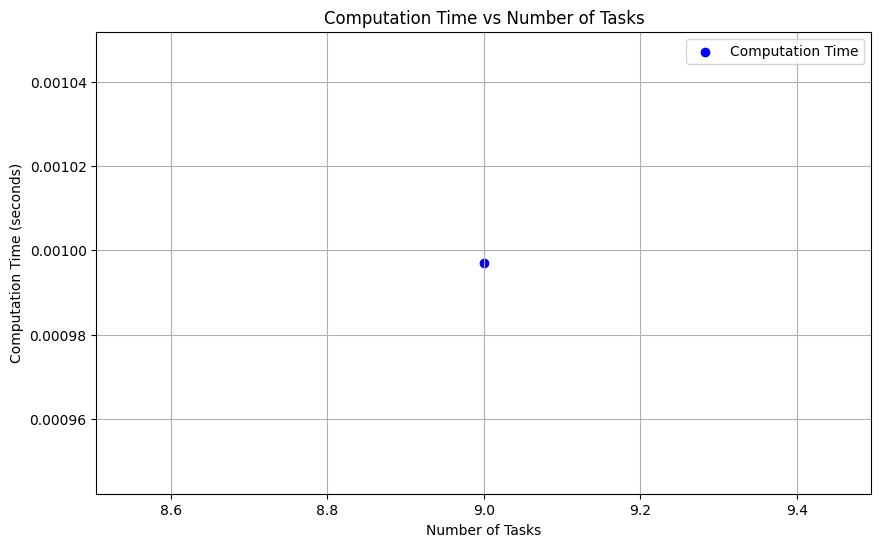

In [6]:
#figure computational time with nine tasks 

# pip install lark-parser
# pip install pydot
# pip install pillow
# pip install matplotlib

from lark import Lark, Tree, Token
import matplotlib.pyplot as plt
import random
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 * num_traces_2, 
                sum_lists(sum_impacts_1, sum_impacts_2),
                sum_lists(min_impact_1, min_impact_2), 
                sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        return (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 + num_traces_2,
                sum_lists(impacts_1, impacts_2),
                pairwise_min_lists(min_impact_1, min_impact_2),
                pairwise_max_lists(max_impacts_1, max_impacts_2))

# Generate random sequence
def generate_random_sequence():
    parts = [
        "parcel", "wait_24", "user_cancel", "refund_user_fault",
        "car", "drone", "check_availability", "wait12",
        "refund_company_fault", "payment_validation", "validation_cancel"
    ]
    random.shuffle(parts)
    b1r2 = f"( {parts[0]} || {parts[1]} ) , ( ( {parts[2]}, {parts[3]} ) ^ ( {parts[4]} ^ {parts[5]} ) )"
    b1r1 = f'check_availability, (( {b1r2} ^ ({b1r2} ^ {b1r2}) ) ^ (wait12, refund_company_fault))'
    b1 = f'payment_validation, ( validation_cancel ^ {b1r1} )'
    return b1

# Impact dictionary
task_impacts = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "validation_cancel": [0, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_company_fault": [1, 105, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1],
    "wait_24": [0, 0, 0, 0],  # Added missing key
    "wait12": [0, 0, 0, 0]   # Added missing key
}

# Get number of tasks in the sequence
def get_tasks(t):
    trees = [subtree for subtree in t.iter_subtrees()]
    tasks = {subtree.children[0].value for subtree in filter(lambda x: x.data == 'task', trees)}
    return tasks

# Generate one random sequence
sequence = generate_random_sequence()
print(f"Generated sequence: {sequence}")

# Parse and compute the impact vector
parsed_tree = parser.parse(sequence)

start_time = time.time()  # Start measuring time
result = compute_impact_vector(parsed_tree, task_impacts)
end_time = time.time()  # Stop measuring time

# Calculate computation time
computation_time = end_time - start_time

# Get number of tasks in the sequence
tasks_in_sequence = get_tasks(parsed_tree)
num_tasks = len(tasks_in_sequence)

# Print results
num_traces, sum_impacts, min_impacts, max_impacts = result
print(f"Number of traces: {num_traces}")
print(f"Sum of impacts: {sum_impacts}")
print(f"Min impacts: {min_impacts}")
print(f"Max impacts: {max_impacts}")
print(f"Number of tasks in the sequence: {num_tasks}")
print(f"Tasks in the sequence: {tasks_in_sequence}")
print(f"Computation time: {computation_time} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(num_tasks, computation_time, color='blue', label='Computation Time')
plt.xlabel('Number of Tasks')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()


Sequence: check_availability, (cancel_company || confirmation || (wait24, user_cancel, refund_user_fault) || (update, payment_validation, parcel, (car, drone)))
Number of traces: 1
Sum of impacts: [13, 85, 17, 19]
Min impacts: [13, 85, 17, 19]
Max impacts: [13, 85, 17, 19]
Number of tasks in the sequence: 11
Tasks in the sequence: {'user_cancel', 'cancel_company', 'update', 'confirmation', 'wait24', 'payment_validation', 'car', 'refund_user_fault', 'drone', 'parcel', 'check_availability'}
Computation time: 0.0002021000 seconds


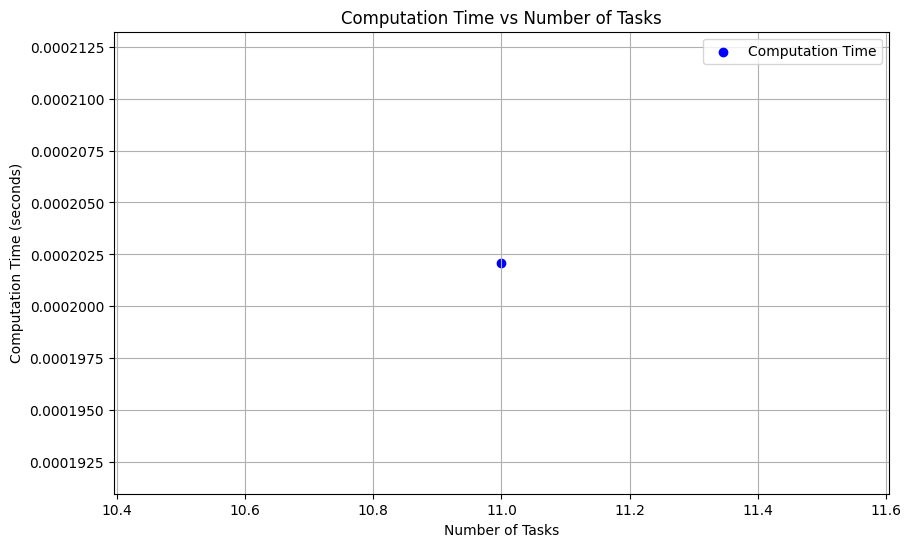

In [6]:

#compuational time with 11 tasks 
from lark import Lark, Tree, Token
import matplotlib.pyplot as plt
import random
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 * num_traces_2, 
                sum_lists(sum_impacts_1, sum_impacts_2),
                sum_lists(min_impact_1, min_impact_2), 
                sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        return (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 + num_traces_2,
                sum_lists(impacts_1, impacts_2),
                pairwise_min_lists(min_impact_1, min_impact_2),
                pairwise_max_lists(max_impacts_1, max_impacts_2))

# Impact dictionary
task_impacts = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "confirmation": [1, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1],
    "cancel_company": [0, 0, 0, 1],
    "update": [1, 0, 0, 1],
    "wait24": [0, 0, 0, 0]
}

# Get number of tasks in the sequence
def get_tasks(t):
    trees = [subtree for subtree in t.iter_subtrees()]
    tasks = {subtree.children[0].value for subtree in filter(lambda x: x.data == 'task', trees)}
    return tasks

# Example sequence B2
B2 = "check_availability, (cancel_company || confirmation || (wait24, user_cancel, refund_user_fault) || (update, payment_validation, parcel, (car, drone)))"
print(f"Sequence: {B2}")

# Parse and compute the impact vector
parsed_tree = parser.parse(B2)

start_time = time.perf_counter()  # Start measuring time
result = compute_impact_vector(parsed_tree, task_impacts)
end_time = time.perf_counter()   # Stop measuring time

# Calculate computation time
computation_time = end_time - start_time

# Get number of tasks in the sequence
tasks_in_sequence = get_tasks(parsed_tree)
num_tasks = len(tasks_in_sequence)

# Print results
num_traces, sum_impacts, min_impacts, max_impacts = result
print(f"Number of traces: {num_traces}")
print(f"Sum of impacts: {sum_impacts}")
print(f"Min impacts: {min_impacts}")
print(f"Max impacts: {max_impacts}")
print(f"Number of tasks in the sequence: {num_tasks}")
print(f"Tasks in the sequence: {tasks_in_sequence}")
print(f"Computation time: {computation_time:.10f} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(num_tasks, computation_time, color='blue', label='Computation Time')
plt.xlabel('Number of Tasks')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()


Sequence: ( parcel ^ wait24 )
Number of traces: 2
Sum of impacts: [1, 0, 0, 2]
Min impacts: [0, 0, 0, 0]
Max impacts: [1, 0, 0, 2]
Number of tasks in the sequence: 2
Tasks in the sequence: {'wait24', 'parcel'}
Computation time: 0.00012740000966005027 seconds


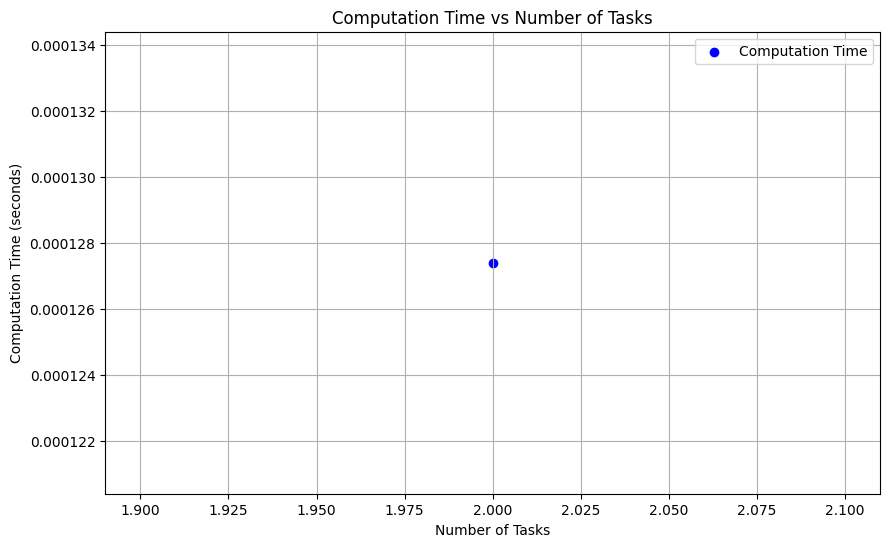

In [9]:
#computational time with 2 tasks in the sequences
from lark import Lark
import matplotlib.pyplot as plt
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations (unchanged)
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function (unchanged)
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 * num_traces_2, 
                sum_lists(sum_impacts_1, sum_impacts_2),
                sum_lists(min_impact_1, min_impact_2), 
                sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        return (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 + num_traces_2,
                sum_lists(impacts_1, impacts_2),
                pairwise_min_lists(min_impact_1, min_impact_2),
                pairwise_max_lists(max_impacts_1, max_impacts_2))

# Impact dictionary
task_impacts = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0]
}

# Get number of tasks in the sequence (unchanged)
def get_tasks(t):
    trees = [subtree for subtree in t.iter_subtrees()]
    tasks = {subtree.children[0].value for subtree in filter(lambda x: x.data == 'task', trees)}
    return tasks

# Example sequence B3
B3 = "( parcel ^ wait24 )"
print(f"Sequence: {B3}")

# Parse and compute the impact vector
parsed_tree = parser.parse(B3)

start_time = time.perf_counter()  # Start measuring time
result = compute_impact_vector(parsed_tree, task_impacts)
end_time = time.perf_counter()  # Stop measuring time

# Calculate computation time
computation_time = end_time - start_time

# Get number of tasks in the sequence
tasks_in_sequence = get_tasks(parsed_tree)
num_tasks = len(tasks_in_sequence)

# Print results
num_traces, sum_impacts, min_impacts, max_impacts = result
print(f"Number of traces: {num_traces}")
print(f"Sum of impacts: {sum_impacts}")
print(f"Min impacts: {min_impacts}")
print(f"Max impacts: {max_impacts}")
print(f"Number of tasks in the sequence: {num_tasks}")
print(f"Tasks in the sequence: {tasks_in_sequence}")
print(f"Computation time: {computation_time} seconds")

# Plotting the results (unchanged)
plt.figure(figsize=(10, 6))
plt.scatter(num_tasks, computation_time, color='blue', label='Computation Time')
plt.xlabel('Number of Tasks')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()


Sequence: ( parcel ^ wait24 ^ task1 )
Number of traces: 3
Sum of impacts: [2, 2, 3, 6]
Min impacts: [0, 0, 0, 0]
Max impacts: [1, 2, 3, 4]
Number of tasks in the sequence: 3
Tasks in the sequence: {'task1', 'wait24', 'parcel'}
Computation time: 0.00012989999959245324 seconds


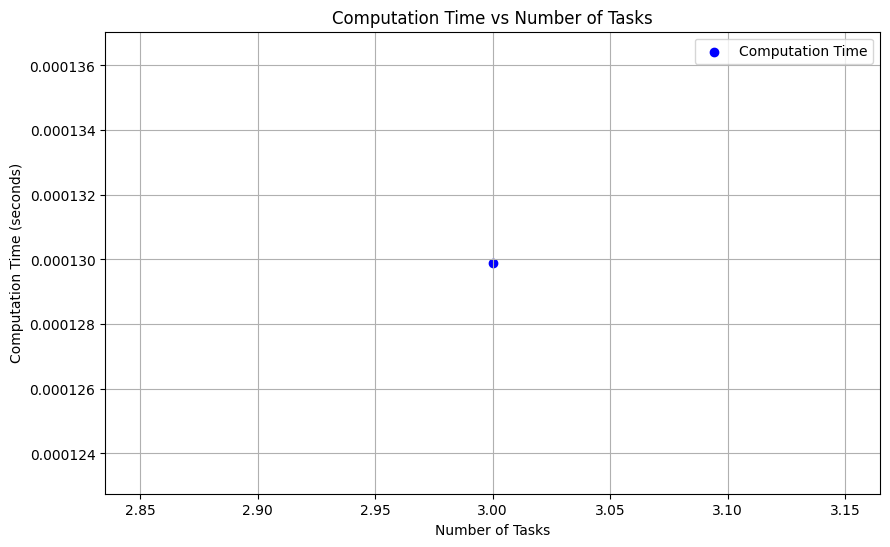

In [10]:

#computational time with three tasks in the sequences
from lark import Lark
import matplotlib.pyplot as plt
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations (unchanged)
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function (unchanged)
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 * num_traces_2, 
                sum_lists(sum_impacts_1, sum_impacts_2),
                sum_lists(min_impact_1, min_impact_2), 
                sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        return (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 + num_traces_2,
                sum_lists(impacts_1, impacts_2),
                pairwise_min_lists(min_impact_1, min_impact_2),
                pairwise_max_lists(max_impacts_1, max_impacts_2))

# Impact dictionary
task_impacts = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4]  # Impact values for task1
}

# Example sequence B3 with three tasks
B4 = "( parcel ^ wait24 ^ task1 )"
print(f"Sequence: {B4}")

# Parse and compute the impact vector
parsed_tree = parser.parse(B4)


start_time = time.perf_counter()  # Start measuring time
result = compute_impact_vector(parsed_tree, task_impacts)
end_time = time.perf_counter()  # Stop measuring time

# Calculate computation time
computation_time = end_time - start_time

# Get number of tasks in the sequence
tasks_in_sequence = get_tasks(parsed_tree)
num_tasks = len(tasks_in_sequence)

# Print results
num_traces, sum_impacts, min_impacts, max_impacts = result
print(f"Number of traces: {num_traces}")
print(f"Sum of impacts: {sum_impacts}")
print(f"Min impacts: {min_impacts}")
print(f"Max impacts: {max_impacts}")
print(f"Number of tasks in the sequence: {num_tasks}")
print(f"Tasks in the sequence: {tasks_in_sequence}")
print(f"Computation time: {computation_time} seconds")

# Plotting the results (unchanged)
plt.figure(figsize=(10, 6))
plt.scatter(num_tasks, computation_time, color='blue', label='Computation Time')
plt.xlabel('Number of Tasks')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()


Sequence (2_tasks): ( parcel ^ wait24 )
Number of traces: 2
Sum of impacts: [1, 0, 0, 2]
Min impacts: [0, 0, 0, 0]
Max impacts: [1, 0, 0, 2]
Number of tasks in the sequence: 2
Tasks in the sequence: {'wait24', 'parcel'}
Computation time: 0.0000145000 seconds
Sequence (3_tasks): ( parcel ^ wait24 ^ task1 )
Number of traces: 3
Sum of impacts: [2, 2, 3, 6]
Min impacts: [0, 0, 0, 0]
Max impacts: [1, 2, 3, 4]
Number of tasks in the sequence: 3
Tasks in the sequence: {'task1', 'wait24', 'parcel'}
Computation time: 0.0000194000 seconds
Sequence (11_tasks): check_availability, (cancel_company || confirmation || (wait24, user_cancel, refund_user_fault) || (update, payment_validation, parcel, (car, drone)))
Number of traces: 1
Sum of impacts: [13, 85, 17, 19]
Min impacts: [13, 85, 17, 19]
Max impacts: [13, 85, 17, 19]
Number of tasks in the sequence: 11
Tasks in the sequence: {'user_cancel', 'cancel_company', 'update', 'confirmation', 'wait24', 'payment_validation', 'car', 'refund_user_fault', '

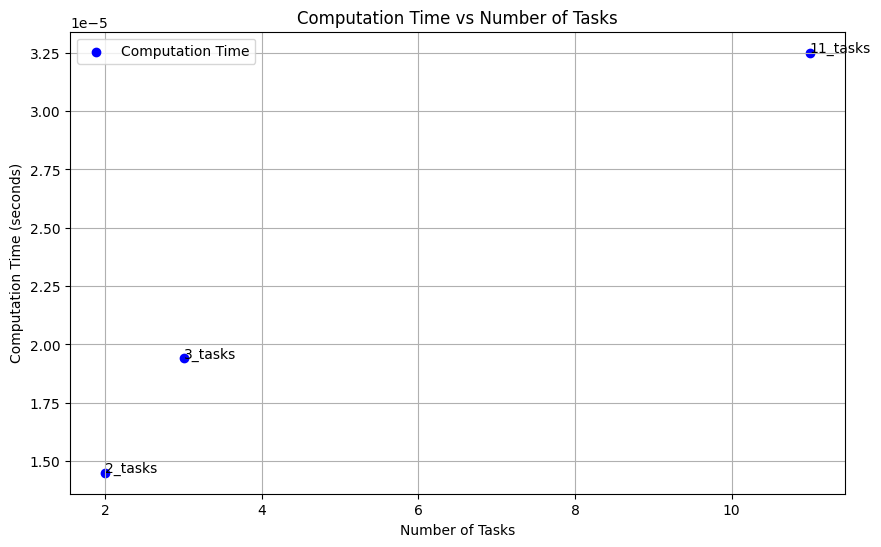

In [12]:
#all in one 
from lark import Lark
import matplotlib.pyplot as plt
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 * num_traces_2, 
                sum_lists(sum_impacts_1, sum_impacts_2),
                sum_lists(min_impact_1, min_impact_2), 
                sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        return (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 + num_traces_2,
                sum_lists(impacts_1, impacts_2),
                pairwise_min_lists(min_impact_1, min_impact_2),
                pairwise_max_lists(max_impacts_1, max_impacts_2))

# Get number of tasks in the sequence
def get_tasks(t):
    trees = [subtree for subtree in t.iter_subtrees()]
    tasks = {subtree.children[0].value for subtree in filter(lambda x: x.data == 'task', trees)}
    return tasks

# Define task impacts for different sequences
task_impacts_2_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0]
}

task_impacts_3_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4]
}

task_impacts_11_tasks = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "confirmation": [1, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1],
    "cancel_company": [0, 0, 0, 1],
    "update": [1, 0, 0, 1],
    "wait24": [0, 0, 0, 0]
}

# Define sequences
sequences = {
    "2_tasks": "( parcel ^ wait24 )",
    "3_tasks": "( parcel ^ wait24 ^ task1 )",
    "11_tasks": "check_availability, (cancel_company || confirmation || (wait24, user_cancel, refund_user_fault) || (update, payment_validation, parcel, (car, drone)))"
}

# Store computation times and number of tasks
computation_times = []
num_tasks_list = []

# Process each sequence
for key, seq in sequences.items():
    print(f"Sequence ({key}): {seq}")
    task_impacts = eval(f"task_impacts_{key}")
    parsed_tree = parser.parse(seq)

    start_time = time.perf_counter()  # Start measuring time
    result = compute_impact_vector(parsed_tree, task_impacts)
    end_time = time.perf_counter()  # Stop measuring time

    # Calculate computation time
    computation_time = end_time - start_time

    # Get number of tasks in the sequence
    tasks_in_sequence = get_tasks(parsed_tree)
    num_tasks = len(tasks_in_sequence)

    # Print results
    num_traces, sum_impacts, min_impacts, max_impacts = result
    print(f"Number of traces: {num_traces}")
    print(f"Sum of impacts: {sum_impacts}")
    print(f"Min impacts: {min_impacts}")
    print(f"Max impacts: {max_impacts}")
    print(f"Number of tasks in the sequence: {num_tasks}")
    print(f"Tasks in the sequence: {tasks_in_sequence}")
    print(f"Computation time: {computation_time:.10f} seconds")

    # Append results to lists
    computation_times.append(computation_time)
    num_tasks_list.append(num_tasks)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(num_tasks_list, computation_times, color='blue', label='Computation Time')
for i, txt in enumerate(sequences.keys()):
    plt.annotate(txt, (num_tasks_list[i], computation_times[i]))
plt.xlabel('Number of Tasks')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()


Sequence (2_tasks): ( parcel ^ wait24 )
Number of traces: 2
Sum of impacts: [1, 0, 0, 2]
Min impacts: [0, 0, 0, 0]
Max impacts: [1, 0, 0, 2]
Number of tasks in the sequence: 2
Tasks in the sequence: {'wait24', 'parcel'}
Computation time: 0.0003479000 seconds
Sequence (3_tasks): ( parcel ^ wait24 ^ task1 )
Number of traces: 3
Sum of impacts: [2, 2, 3, 6]
Min impacts: [0, 0, 0, 0]
Max impacts: [1, 2, 3, 4]
Number of tasks in the sequence: 3
Tasks in the sequence: {'task1', 'wait24', 'parcel'}
Computation time: 0.0000304000 seconds
Sequence (5_tasks): ( parcel ^ wait24 ^ task1 ^ task2 ^ task3 )
Number of traces: 5
Sum of impacts: [4, 4, 7, 11]
Min impacts: [0, 0, 0, 0]
Max impacts: [2, 2, 3, 4]
Number of tasks in the sequence: 5
Tasks in the sequence: {'wait24', 'task3', 'task1', 'task2', 'parcel'}
Computation time: 0.0000412000 seconds
Sequence (7_tasks): ( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 )
Number of traces: 7
Sum of impacts: [7, 5, 11, 17]
Min impacts: [0, 0, 0, 

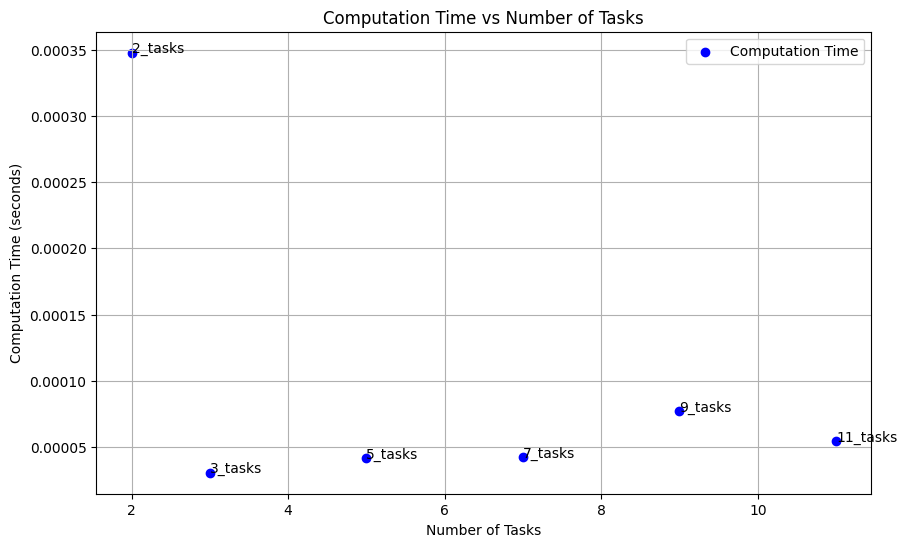

In [13]:
#compuational time for 2,3 5,7,9 ,11 tasks in the sequences 
from lark import Lark
import matplotlib.pyplot as plt
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 * num_traces_2, 
                sum_lists(sum_impacts_1, sum_impacts_2),
                sum_lists(min_impact_1, min_impact_2), 
                sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        return (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 + num_traces_2,
                sum_lists(impacts_1, impacts_2),
                pairwise_min_lists(min_impact_1, min_impact_2),
                pairwise_max_lists(max_impacts_1, max_impacts_2))

# Get number of tasks in the sequence
def get_tasks(t):
    trees = [subtree for subtree in t.iter_subtrees()]
    tasks = {subtree.children[0].value for subtree in filter(lambda x: x.data == 'task', trees)}
    return tasks

# Define task impacts for different sequences
task_impacts_2_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0]
}

task_impacts_3_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4]
}

task_impacts_5_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4],
    "task2": [2, 1, 3, 2],
    "task3": [0, 1, 1, 3]
}

task_impacts_7_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4],
    "task2": [2, 1, 3, 2],
    "task3": [0, 1, 1, 3],
    "task4": [1, 1, 2, 2],
    "task5": [2, 0, 2, 4]
}

task_impacts_9_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4],
    "task2": [2, 1, 3, 2],
    "task3": [0, 1, 1, 3],
    "task4": [1, 1, 2, 2],
    "task5": [2, 0, 2, 4],
    "task6": [3, 0, 0, 1],
    "task7": [0, 3, 2, 1]
}

task_impacts_11_tasks = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "confirmation": [1, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1],
    "cancel_company": [0, 0, 0, 1],
    "update": [1, 0, 0, 1],
    "wait24": [0, 0, 0, 0]
}

# Define sequences
sequences = {
    "2_tasks": "( parcel ^ wait24 )",
    "3_tasks": "( parcel ^ wait24 ^ task1 )",
    "5_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 )",
    "7_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 )",
    "9_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 ^ task6 ^ task7 )",
    "11_tasks": "check_availability, (cancel_company || confirmation || (wait24, user_cancel, refund_user_fault) || (update, payment_validation, parcel, (car, drone)))"
}

# Store computation times and number of tasks
computation_times = []
num_tasks_list = []

# Process each sequence
for key, seq in sequences.items():
    print(f"Sequence ({key}): {seq}")
    task_impacts = eval(f"task_impacts_{key}")
    parsed_tree = parser.parse(seq)

    start_time = time.perf_counter()  # Start measuring time
    result = compute_impact_vector(parsed_tree, task_impacts)
    end_time = time.perf_counter()  # Stop measuring time

    # Calculate computation time
    computation_time = end_time - start_time

    # Get number of tasks in the sequence
    tasks_in_sequence = get_tasks(parsed_tree)
    num_tasks = len(tasks_in_sequence)

    # Print results
    num_traces, sum_impacts, min_impacts, max_impacts = result
    print(f"Number of traces: {num_traces}")
    print(f"Sum of impacts: {sum_impacts}")
    print(f"Min impacts: {min_impacts}")
    print(f"Max impacts: {max_impacts}")
    print(f"Number of tasks in the sequence: {num_tasks}")
    print(f"Tasks in the sequence: {tasks_in_sequence}")
    print(f"Computation time: {computation_time:.10f} seconds")

    # Append results to lists
    computation_times.append(computation_time)
    num_tasks_list.append(num_tasks)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(num_tasks_list, computation_times, color='blue', label='Computation Time')
for i, txt in enumerate(sequences.keys()):
    plt.annotate(txt, (num_tasks_list[i], computation_times[i]))
plt.xlabel('Number of Tasks')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()


Sequence (2_tasks): ( parcel ^ wait24 )
Number of traces: 2
Sum of impacts: [1, 0, 0, 2]
Min impacts: [0, 0, 0, 0]
Max impacts: [1, 0, 0, 2]
Number of tasks in the sequence: 2
Tasks in the sequence: {'wait24', 'parcel'}
Computation time: 0.0000239000 seconds
Sequence (3_tasks): ( parcel ^ wait24 ^ task1 )
Number of traces: 3
Sum of impacts: [2, 2, 3, 6]
Min impacts: [0, 0, 0, 0]
Max impacts: [1, 2, 3, 4]
Number of tasks in the sequence: 3
Tasks in the sequence: {'task1', 'wait24', 'parcel'}
Computation time: 0.0000326000 seconds
Sequence (5_tasks): ( parcel ^ wait24 ^ task1 ^ task2 ^ task3 )
Number of traces: 5
Sum of impacts: [4, 4, 7, 11]
Min impacts: [0, 0, 0, 0]
Max impacts: [2, 2, 3, 4]
Number of tasks in the sequence: 5
Tasks in the sequence: {'wait24', 'task3', 'task1', 'task2', 'parcel'}
Computation time: 0.0000614000 seconds
Sequence (7_tasks): ( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 )
Number of traces: 7
Sum of impacts: [7, 5, 11, 17]
Min impacts: [0, 0, 0, 

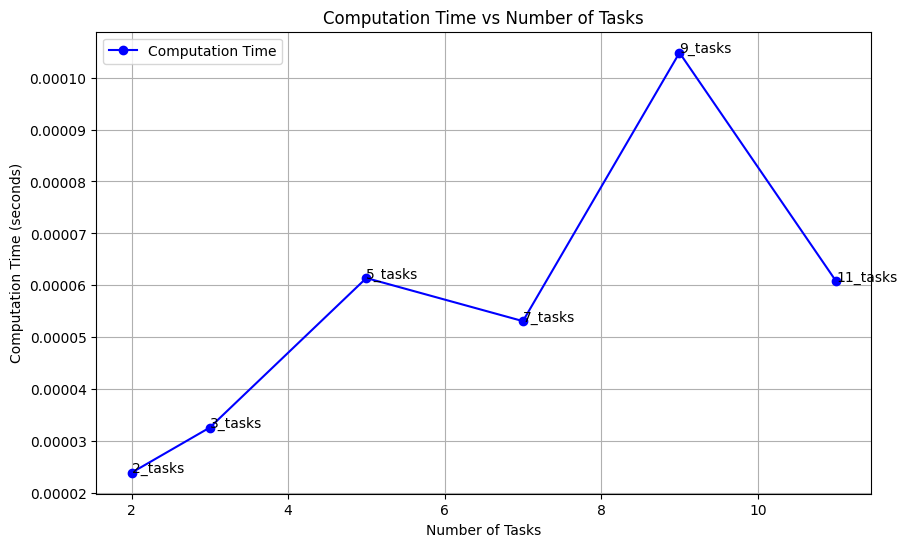

In [14]:
from lark import Lark
import matplotlib.pyplot as plt
import time

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 * num_traces_2, 
                sum_lists(sum_impacts_1, sum_impacts_2),
                sum_lists(min_impact_1, min_impact_2), 
                sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        return (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 + num_traces_2,
                sum_lists(impacts_1, impacts_2),
                pairwise_min_lists(min_impact_1, min_impact_2),
                pairwise_max_lists(max_impacts_1, max_impacts_2))

# Get number of tasks in the sequence
def get_tasks(t):
    trees = [subtree for subtree in t.iter_subtrees()]
    tasks = {subtree.children[0].value for subtree in filter(lambda x: x.data == 'task', trees)}
    return tasks

# Define task impacts for different sequences
task_impacts_2_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0]
}

task_impacts_3_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4]
}

task_impacts_5_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4],
    "task2": [2, 1, 3, 2],
    "task3": [0, 1, 1, 3]
}

task_impacts_7_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4],
    "task2": [2, 1, 3, 2],
    "task3": [0, 1, 1, 3],
    "task4": [1, 1, 2, 2],
    "task5": [2, 0, 2, 4]
}

task_impacts_9_tasks = {
    "parcel": [1, 0, 0, 2],
    "wait24": [0, 0, 0, 0],
    "task1": [1, 2, 3, 4],
    "task2": [2, 1, 3, 2],
    "task3": [0, 1, 1, 3],
    "task4": [1, 1, 2, 2],
    "task5": [2, 0, 2, 4],
    "task6": [3, 0, 0, 1],
    "task7": [0, 3, 2, 1]
}

task_impacts_11_tasks = {
    "car": [5, 0, 10, 10],
    "drone": [3, 0, 7, 0],
    "payment_validation": [0, 0, 0, 1],
    "confirmation": [1, 0, 0, 1],
    "check_availability": [1, 0, 0, 1],
    "refund_user_fault": [1, 85, 0, 1],
    "parcel": [1, 0, 0, 2],
    "user_cancel": [0, 0, 0, 1],
    "cancel_company": [0, 0, 0, 1],
    "update": [1, 0, 0, 1],
    "wait24": [0, 0, 0, 0]
}

# Define sequences
sequences = {
    "2_tasks": "( parcel ^ wait24 )",
    "3_tasks": "( parcel ^ wait24 ^ task1 )",
    "5_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 )",
    "7_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 )",
    "9_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 ^ task6 ^ task7 )",
    "11_tasks": "check_availability, (cancel_company || confirmation || (wait24, user_cancel, refund_user_fault) || (update, payment_validation, parcel, (car, drone)))"
}

# Store computation times and number of tasks
computation_times = []
num_tasks_list = []

# Process each sequence
for key, seq in sequences.items():
    print(f"Sequence ({key}): {seq}")
    task_impacts = eval(f"task_impacts_{key}")
    parsed_tree = parser.parse(seq)

    start_time = time.perf_counter()  # Start measuring time
    result = compute_impact_vector(parsed_tree, task_impacts)
    end_time = time.perf_counter()  # Stop measuring time

    # Calculate computation time
    computation_time = end_time - start_time

    # Get number of tasks in the sequence
    tasks_in_sequence = get_tasks(parsed_tree)
    num_tasks = len(tasks_in_sequence)

    # Print results
    num_traces, sum_impacts, min_impacts, max_impacts = result
    print(f"Number of traces: {num_traces}")
    print(f"Sum of impacts: {sum_impacts}")
    print(f"Min impacts: {min_impacts}")
    print(f"Max impacts: {max_impacts}")
    print(f"Number of tasks in the sequence: {num_tasks}")
    print(f"Tasks in the sequence: {tasks_in_sequence}")
    print(f"Computation time: {computation_time:.10f} seconds")

    # Append results to lists
    computation_times.append(computation_time)
    num_tasks_list.append(num_tasks)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(num_tasks_list, computation_times, marker='o', linestyle='-', color='blue', label='Computation Time')
for i, txt in enumerate(sequences.keys()):
    plt.annotate(txt, (num_tasks_list[i], computation_times[i]))
plt.xlabel('Number of Tasks')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()


Sequence (2_tasks): ( parcel ^ wait24 )
Number of traces: 2
Sum of impacts: [12.665304935557959]
Min impacts: [3.142640624258468]
Max impacts: [9.522664311299492]
Number of tasks in the sequence: 2
Tasks in the sequence: {'wait24', 'parcel'}
Computation time: 0.0000351000 seconds
Sequence (3_tasks): ( parcel ^ wait24 ^ task1 )
Number of traces: 3
Sum of impacts: [18.42666354205785]
Min impacts: [3.142640624258468]
Max impacts: [9.522664311299492]
Number of tasks in the sequence: 3
Tasks in the sequence: {'task1', 'wait24', 'parcel'}
Computation time: 0.0000278000 seconds
Sequence (5_tasks): ( parcel ^ wait24 ^ task1 ^ task2 ^ task3 )
Number of traces: 5
Sum of impacts: [32.745346972679584]
Min impacts: [3.142640624258468]
Max impacts: [9.522664311299492]
Number of tasks in the sequence: 5
Tasks in the sequence: {'wait24', 'task3', 'task1', 'task2', 'parcel'}
Computation time: 0.0000290000 seconds
Sequence (7_tasks): ( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 )
Number of 

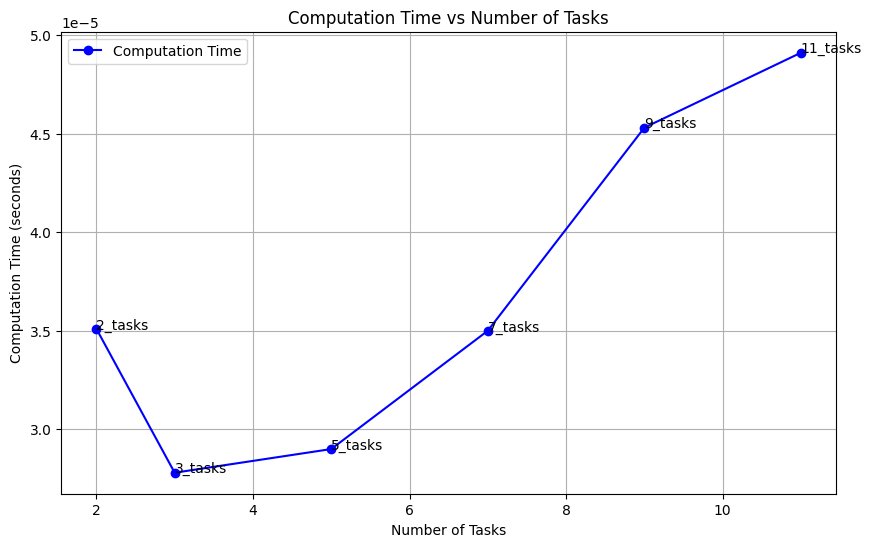

In [15]:
#compuational time with the scalar impact , which means each task has one impact
from lark import Lark
import matplotlib.pyplot as plt
import time
import random

# Grammar definition
process_grammar = r"""
?start: xor

?xor: parallel
    | xor "^" parallel -> xor

?parallel: sequential
    | parallel "||" sequential  -> parallel

?sequential: region
    | sequential "," region -> sequential

?region: 
     | NAME   -> task
     | "(" xor ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE

%ignore WS_INLINE
"""

parser = Lark(process_grammar, parser='lalr')

# List operations
def sum_lists(l1, l2):
    return [a + b for a, b in zip(l1, l2)]

def pairwise_min_lists(l1, l2):
    return [min(a, b) for a, b in zip(l1, l2)]

def pairwise_max_lists(l1, l2):
    return [max(a, b) for a, b in zip(l1, l2)]

def scalar_mul(k, l):
    return [k * a for a in l]    

# Impact computation function
def compute_impact_vector(tree, task_impacts):
    if tree.data == 'sequential' or tree.data == 'parallel':
        num_traces_1, sum_impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, sum_impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 * num_traces_2, 
                sum_lists(sum_impacts_1, sum_impacts_2),
                sum_lists(min_impact_1, min_impact_2), 
                sum_lists(max_impacts_1, max_impacts_2))

    elif tree.data == 'task':
        impacts = min_impact = max_impacts = task_impacts[tree.children[0].value]
        num_traces = 1
        return (num_traces, impacts, min_impact, max_impacts)

    elif tree.data == 'xor':
        num_traces_1, impacts_1, min_impact_1, max_impacts_1 = compute_impact_vector(tree.children[0], task_impacts)
        num_traces_2, impacts_2, min_impact_2, max_impacts_2 = compute_impact_vector(tree.children[1], task_impacts)
        return (num_traces_1 + num_traces_2,
                sum_lists(impacts_1, impacts_2),
                pairwise_min_lists(min_impact_1, min_impact_2),
                pairwise_max_lists(max_impacts_1, max_impacts_2))

# Get number of tasks in the sequence
def get_tasks(t):
    trees = [subtree for subtree in t.iter_subtrees()]
    tasks = {subtree.children[0].value for subtree in filter(lambda x: x.data == 'task', trees)}
    return tasks

# Define sequences
sequences = {
    "2_tasks": "( parcel ^ wait24 )",
    "3_tasks": "( parcel ^ wait24 ^ task1 )",
    "5_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 )",
    "7_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 )",
    "9_tasks": "( parcel ^ wait24 ^ task1 ^ task2 ^ task3 ^ task4 ^ task5 ^ task6 ^ task7 )",
    "11_tasks": "check_availability, (cancel_company || confirmation || (wait24, user_cancel, refund_user_fault) || (update, payment_validation, parcel, (car, drone)))"
}

# Generate random scalar impacts
task_names = {
    "parcel", "wait24", "task1", "task2", "task3", "task4", "task5", "task6", "task7",
    "car", "drone", "payment_validation", "confirmation", "check_availability", "refund_user_fault",
    "user_cancel", "cancel_company", "update"
}

task_impacts_dict = {task: [random.uniform(0, 10)] for task in task_names}

# Store computation times and number of tasks
computation_times = []
num_tasks_list = []

# Process each sequence
for key, seq in sequences.items():
    print(f"Sequence ({key}): {seq}")
    task_impacts = task_impacts_dict
    parsed_tree = parser.parse(seq)

    start_time = time.perf_counter()  # Start measuring time
    result = compute_impact_vector(parsed_tree, task_impacts)
    end_time = time.perf_counter()  # Stop measuring time

    # Calculate computation time
    computation_time = end_time - start_time

    # Get number of tasks in the sequence
    tasks_in_sequence = get_tasks(parsed_tree)
    num_tasks = len(tasks_in_sequence)

    # Print results
    num_traces, sum_impacts, min_impacts, max_impacts = result
    print(f"Number of traces: {num_traces}")
    print(f"Sum of impacts: {sum_impacts}")
    print(f"Min impacts: {min_impacts}")
    print(f"Max impacts: {max_impacts}")
    print(f"Number of tasks in the sequence: {num_tasks}")
    print(f"Tasks in the sequence: {tasks_in_sequence}")
    print(f"Computation time: {computation_time:.10f} seconds")

    # Append results to lists
    computation_times.append(computation_time)
    num_tasks_list.append(num_tasks)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(num_tasks_list, computation_times, marker='o', linestyle='-', color='blue', label='Computation Time')
for i, txt in enumerate(sequences.keys()):
    plt.annotate(txt, (num_tasks_list[i], computation_times[i]))
plt.xlabel('Number of Tasks')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()
